<a href="https://colab.research.google.com/github/approjecthub/Machine-learning/blob/master/Facial_Emotion_Recognition(vgg16).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle

In [0]:
#before importing the dataset we want to use this code
# The Kaggle API client expects this file to be in ~/.kaggle,
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# This permissions change avoids a warning on Kaggle tool startup.
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle competitions download -c challenges-in-representation-learning-facial-expression-recognition-challenge

100% 96.6M/96.6M [00:02<00:00, 35.5MB/s]

 88% 81.0M/92.0M [00:01<00:00, 45.6MB/s]
100% 92.0M/92.0M [00:01<00:00, 61.5MB/s]
 83% 16.0M/19.3M [00:00<00:00, 8.42MB/s]
100% 19.3M/19.3M [00:01<00:00, 19.9MB/s]
  0% 0.00/7.01k [00:00<?, ?B/s]
100% 7.01k/7.01k [00:00<00:00, 2.30MB/s]
 65% 50.0M/77.3M [00:03<00:03, 7.94MB/s]
100% 77.3M/77.3M [00:03<00:00, 22.4MB/s]


In [5]:
!tar -zxvf fer2013.tar.gz

fer2013/fer2013.csv
fer2013/README
fer2013/fer2013.bib
fer2013/


In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
 
dataset_path = 'fer2013/fer2013.csv'
image_size=(48,48)
 
def load_fer2013():
    data = pd.read_csv(dataset_path)
    pixels = data['pixels'].tolist()
    width, height = 48, 48
    faces = []
    for pixel_sequence in pixels:
        face = [int(pixel) for pixel in pixel_sequence.split(' ')]
        face = np.asarray(face).reshape(width, height)
        face = cv2.resize(face.astype('uint8'),image_size)
        face = cv2.cvtColor(face,cv2.COLOR_GRAY2RGB)
        faces.append(face.astype('float32'))
    faces = np.asarray(faces)
    #faces = np.expand_dims(faces, -1)
    emotions = pd.get_dummies(data['emotion']).as_matrix()
    return faces, emotions
 
def preprocess_input(x):
    x = x.astype('float32')
    x = x / 255.0

    return x
 
faces, emotions = load_fer2013()
faces = preprocess_input(faces)
xtrain, xtest,ytrain,ytest = train_test_split(faces, emotions,test_size=0.2,shuffle=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


In [7]:
xtrain.shape, ytrain.shape, xtest.shape, ytest.shape

((28709, 48, 48, 3), (28709, 7), (7178, 48, 48, 3), (7178, 7))

/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1150: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


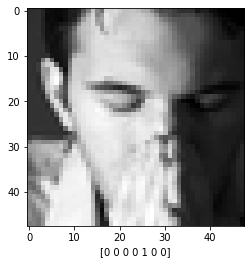

In [0]:
plt.imshow(xtrain[0].reshape(48,48),cmap=plt.cm.gray)

plt.xlabel(ytrain[0])
plt.show()

In [9]:
import keras
from keras import backend as k
from keras.layers import Input
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dropout
from keras.layers.core import Dense, Flatten
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import *
import matplotlib.pyplot as plt
from sklearn.metrics import  confusion_matrix
from keras.optimizers import Adam

Using TensorFlow backend.


In [0]:
# parameters
batch_size = 32
num_epochs = 10
input_shape = (48, 48, 3)
verbose = 1
num_classes = 7

# data generator
data_generator = ImageDataGenerator(
                        featurewise_center=False,
                        featurewise_std_normalization=False,
                        rotation_range=10,
                        width_shift_range=0.1,
                        height_shift_range=0.1,
                        zoom_range=.1,
                        horizontal_flip=True)

In [11]:
model = keras.applications.vgg16.VGG16(weights="imagenet", include_top=False,input_tensor=Input(shape=input_shape))





58892288/58889256 [==============================] - 2s 0us/step








In [0]:
model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 48, 48, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 48, 48, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 48, 48, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 24, 24, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 24, 24, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 24, 24, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 12, 12, 128)       0     

In [12]:
my_new_model = Sequential()
my_new_model.add(model)
my_new_model.add(Flatten())
my_new_model.add(Dense(4096))
my_new_model.add(Activation('relu'))
my_new_model.add(Dense(4096))
my_new_model.add(Activation('relu'))
my_new_model.add(Dense(1000))
my_new_model.add(Activation('relu'))
my_new_model.add(Dropout(0.2))
my_new_model.add(Dense(num_classes, activation='softmax'))

my_new_model.summary()


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 1, 1, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 4096)              2101248   
_________________________________________________________________
activation_1 (Activation)    (None, 4096)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 4096)              16781312  
_________________________________________________________________
activation_2 (Activation)    (None, 4096)              0         
____

In [16]:
my_new_model.layers[0].trainable = True

from keras.optimizers import SGD
opt = SGD(lr=0.00001)
my_new_model.compile( loss='categorical_crossentropy',metrics=['accuracy'],optimizer = opt)

my_new_model.fit_generator(data_generator.flow(xtrain, ytrain,batch_size),
                        steps_per_epoch=len(xtrain) / batch_size,
                        epochs=num_epochs, verbose=1, 
                        validation_data=(xtest,ytest))

Epoch 1/10
898/897 [==============================] - 48s 53ms/step - loss: 1.8107 - acc: 0.2507 - val_loss: 1.8093 - val_acc: 0.2494
Epoch 2/10
898/897 [==============================] - 46s 51ms/step - loss: 1.8107 - acc: 0.2507 - val_loss: 1.8093 - val_acc: 0.2494
Epoch 3/10
898/897 [==============================] - 46s 52ms/step - loss: 1.8109 - acc: 0.2507 - val_loss: 1.8093 - val_acc: 0.2494
Epoch 4/10
898/897 [==============================] - 46s 52ms/step - loss: 1.8111 - acc: 0.2507 - val_loss: 1.8093 - val_acc: 0.2494
Epoch 5/10
898/897 [==============================] - 46s 52ms/step - loss: 1.8108 - acc: 0.2507 - val_loss: 1.8093 - val_acc: 0.2494
Epoch 6/10
898/897 [==============================] - 47s 52ms/step - loss: 1.8105 - acc: 0.2507 - val_loss: 1.8093 - val_acc: 0.2494
Epoch 7/10
898/897 [==============================] - 47s 52ms/step - loss: 1.8107 - acc: 0.2509 - val_loss: 1.8093 - val_acc: 0.2494
Epoch 8/10
898/897 [==============================] - 47s 52ms